# Soccer Mining League
## Predict result one league and one season

#### Data Mining PESC/COPPE/UFRJ
#### Required: Python 3.5, Numpy, Scikit-Learn, Matplotlib

In [1]:
import numpy as np

#Sklearn -- preprocessing 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Plots
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score
from sklearn import manifold

from sklearn.tree import DecisionTreeClassifier

# Soccer Mining League Functions
from functions import *

/home/hugdiniz/Work/programs/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading dataset

#### Reading from file

In [2]:
trainTest = np.loadtxt("../dataset/formated_files/matchs_teams_players_germany_league_2015_2016_formated.csv",delimiter=",")

#### Recover output

In [3]:
outputs = trainTest[:,907]
outputsR = trainTest[:,[908,909]]


## Preprocessing

#### Plot PCA Expectrum for Tatics  (One Team)

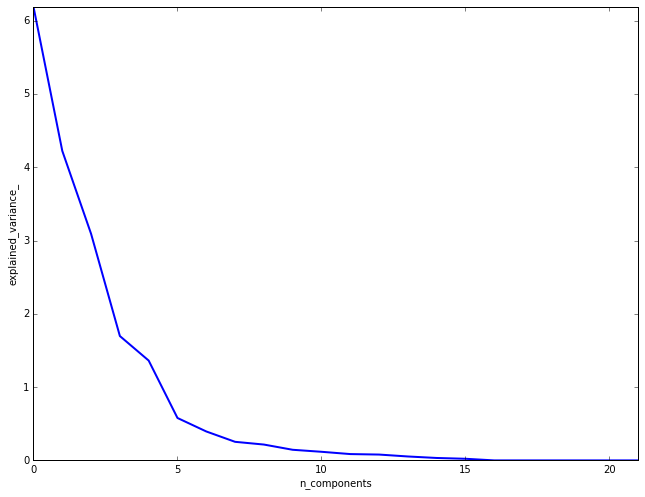

In [4]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeTatics)

#### Plot PCA Expectrum for team rating (One Team)

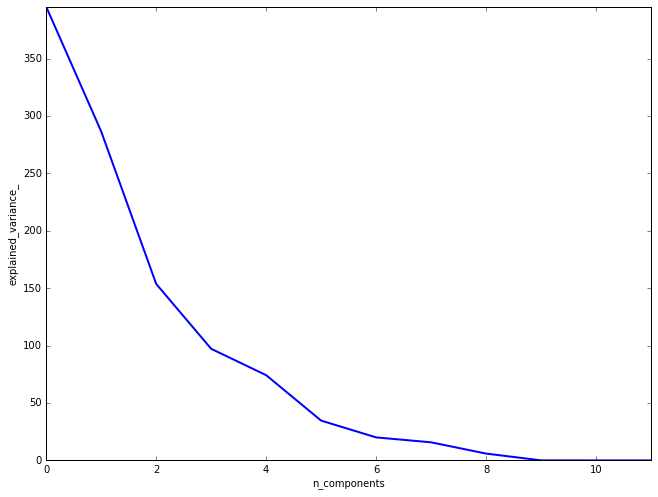

In [5]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
plotPCASpectrum(homeRateTeam)

#### Plot PCA Expectrum for one Player

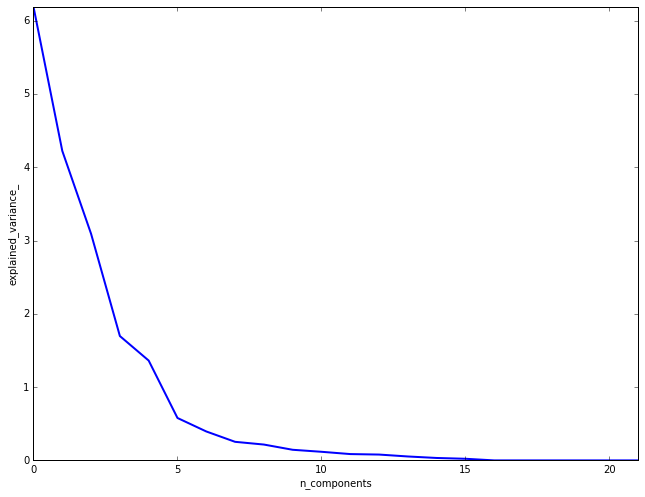

In [6]:
homeRateTeam = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeRateTeam)

#### Plot PCA Expectrum for all Collumn

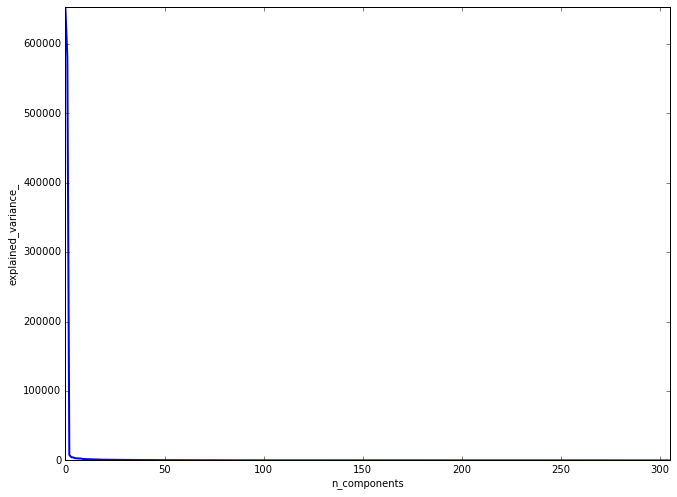

In [28]:
plotPCASpectrum(trainTest[:,:907])

#### Reducing Dimensionality for Tatics

In [8]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
awayTatics = trainTest[:,[14,15,16,17,18,19,20,21,22,23,24,36,37,38,39,40,41,42,43,44,45,46]]

pca = decomposition.PCA(n_components=5)
homeTaticspreprocessed = pca.fit_transform(homeTatics)

pca = decomposition.PCA(n_components=5)
awayTaticspreprocessed = pca.fit_transform(awayTatics)

#### Reducing Dimensionality for team ratings

In [9]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = trainTest[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Plot Teams Match

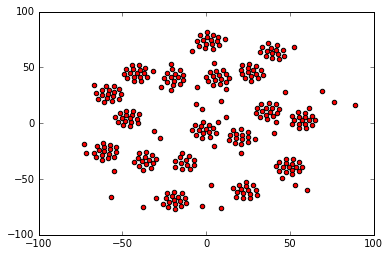

In [10]:
teamsPlot = TSNE(n_components=2).fit_transform(homeRateTeamPreprocessed)


plt.scatter(teamsPlot[:,0], teamsPlot[:,1], c='r', marker='o')
plt.show()

#### Reducing Dimensionality for players

In [11]:
xTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((trainTest[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]


#### Plot players

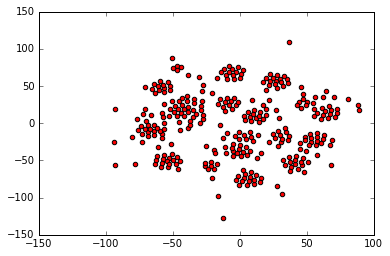

In [12]:
playersRDPlot = TSNE(n_components=2).fit_transform(playersRD[0])


plt.scatter(playersRDPlot[:,0], playersRDPlot[:,1], c='r', marker='o')
plt.show()

#### Maximize sparse teams

In [13]:
enc = preprocessing.OneHotEncoder()
enc.fit(trainTest[:,[0]])
teamsH = enc.transform(trainTest[:,[0]]) 
teamsA = enc.transform(trainTest[:,[1]]) 
teams = (teamsH + teamsA).toarray()

#### Concatenate inputs

In [14]:
date = trainTest[:,[2]]
inputs = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed), axis=1)

for playerRD in playersRD:
    inputs = np.concatenate((inputs,playerRD), axis=1)



#### Scaling inputs

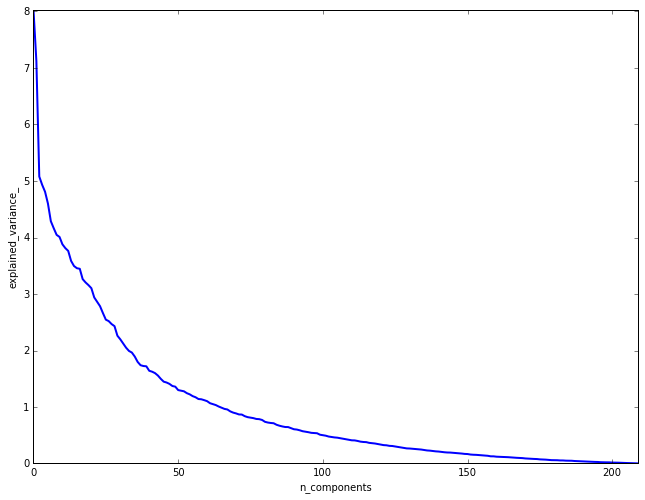

In [15]:
inputs = StandardScaler().fit_transform(inputs)
plotPCASpectrum(inputs)

#### Using ....

In [16]:
inputs = np.concatenate((inputs,teams), axis=1)

#### Input Version PCA for every collumn 

In [17]:
pca = decomposition.PCA(n_components=20)
inputsPCA = pca.fit_transform(np.concatenate((trainTest[:,:907],teams),axis=1))
inputsPCA = StandardScaler().fit_transform(inputsPCA)

## Classification 

#### Using KFold with Naive Bayes

Naive Bayes: = Score:4.59e-01[+/- 7.32e-02]


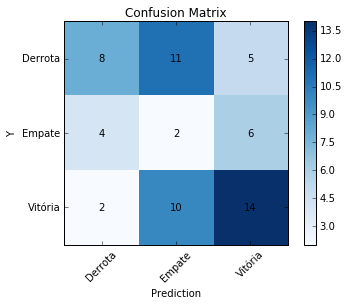

In [18]:
resultSVM = KFoldNB(inputs,outputs)

gnb = GaussianNB()
np.mean(cross_val_score(gnb, inputs, outputs, scoring='accuracy', cv=10))
holdoutPlotConfusionMatrix(gnb,inputs,outputs)

####  Using KFold  with Naive Bayes (PCA for every collumn )

Naive Bayes: = Score:4.58e-01[+/- 8.25e-02]


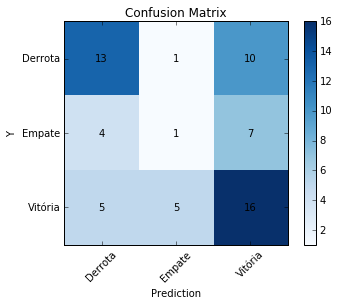

In [43]:
resultSVM = KFoldNB(inputs,outputs)

gnb = GaussianNB()
np.mean(cross_val_score(gnb, inputsPCA, outputs, scoring='accuracy', cv=10))
holdoutPlotConfusionMatrix(gnb,inputsPCA,outputs)

#### Using KFold with SVM with kernel = rbf (PCA for every collumn )

0.483642473118


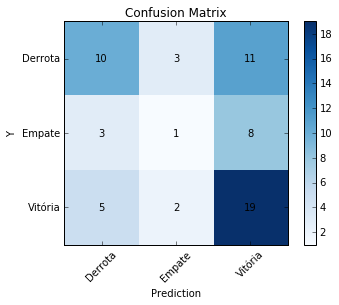

In [20]:
clf = svm.SVC()
print(np.mean(cross_val_score(clf,inputsPCA,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputsPCA,outputs)

#### Using KFold with SVM with kernel = poly (PCA for every collumn )

In [50]:
def executeKFoldPoly(inputs,outputs,coef=1,kernelCLF="poly"):
    clf = svm.SVC(coef0=coef,kernel=kernelCLF)
    result = np.mean(cross_val_score(clf,inputs,outputs,cv=10))
    print( "coef = " + str(coef) + ", kernel = " + kernelCLF + ": " + str(result) + "\n")
    return result

coefs = [1,2,4,8,10,12,14,16]
[executeKFoldPoly(inputsPCA,outputs,coef,"poly") for coef in coefs]

coef = 1, kernel = poly: 0.40127688172

coef = 2, kernel = poly: 0.38502688172

coef = 4, kernel = poly: 0.365551075269

coef = 8, kernel = poly: 0.375551075269

coef = 10, kernel = poly: 0.37877688172

coef = 12, kernel = poly: 0.37877688172

coef = 14, kernel = poly: 0.37877688172

coef = 16, kernel = poly: 0.37877688172



[0.40127688172043019,
 0.38502688172043015,
 0.36555107526881725,
 0.37555107526881726,
 0.37877688172043011,
 0.37877688172043011,
 0.37877688172043011,
 0.37877688172043011]

#### Using KFold with SVM with kernel = linear (PCA for every collumn )


0.459905913978


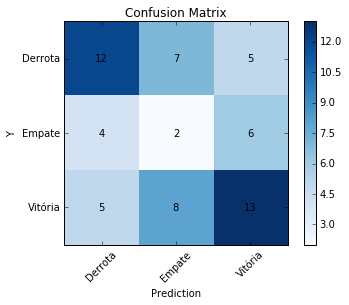

In [51]:
clf = svm.SVC(kernel="linear")
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputsPCA,outputs)

#### Using KFold with SVM with kernel = rbf

In [44]:
def executeKFold(gammaCLF = 1,CCLF = 1,kernelCLF="poly"):
    clf = svm.SVC(gamma=gammaCLF,C=CCLF,kernel=kernelCLF)
    print(str(gammaCLF) + ", " + str(CCLF) + ", " + kernelCLF + ": " + str(np.mean(cross_val_score(clf,inputs,outputs,cv=10))) + "\n")

    
gammas = [0.1,1,2,4,8,10,12,14,16,"auto"]
cs = [0.1,1,2,4,8,10,12,14,16]
#[[executeKFold(gamma,c,"linear")for c in cs] for gamma in gammas]

np.mean(cross_val_score(svm.SVC(),inputs,outputs,cv=10))

0.53270161290322571

0.532701612903


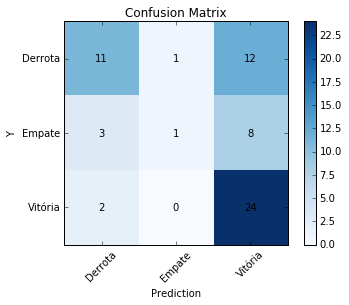

In [52]:
clf = svm.SVC()
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using KFold with SVM with kernel = poly

In [49]:
def executeKFoldPoly(inputs,outputs,coef=1,kernelCLF="poly"):
    clf = svm.SVC(coef0=coef,kernel=kernelCLF)
    result = np.mean(cross_val_score(clf,inputs,outputs,cv=10))
    print( "coef = " + str(coef) + ", kernel = " + kernelCLF + ": " + str(result) + "\n")
    return result
coefs = [1,2,4,8,10,12,14,16]
[executeKFoldPoly(inputs,outputs,coef,"poly") for coef in coefs]

coef = 1, kernel = poly: 0.498850806452

coef = 2, kernel = poly: 0.495826612903

coef = 4, kernel = poly: 0.479274193548

coef = 8, kernel = poly: 0.479274193548

coef = 10, kernel = poly: 0.482708333333

coef = 12, kernel = poly: 0.466572580645

coef = 14, kernel = poly: 0.46001344086

coef = 16, kernel = poly: 0.460120967742



[0.49885080645161295,
 0.49582661290322577,
 0.47927419354838702,
 0.47927419354838702,
 0.48270833333333324,
 0.46657258064516122,
 0.46001344086021501,
 0.46012096774193545]

#### Using KFold with SVM with kernel = linear

0.459905913978


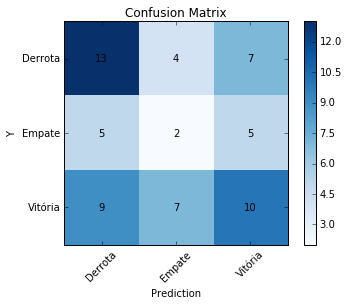

In [45]:
clf = svm.SVC(kernel="linear")
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

#### Using KFold with Logistic Regression

0.493010752688


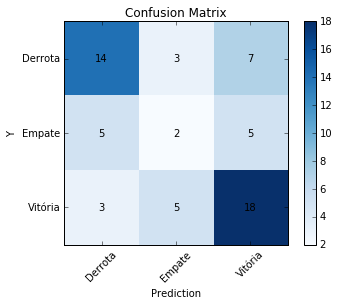

In [23]:
clf = LogisticRegression(penalty='l1')
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

0.483548387097


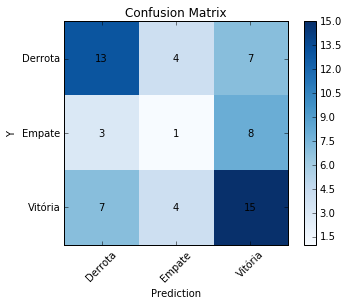

In [54]:
clf = LogisticRegression(penalty='l1')
print(np.mean(cross_val_score(clf,inputsPCA,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputsPCA,outputs)

#### Using KFold with KNeighborsClassifier

0.520315860215


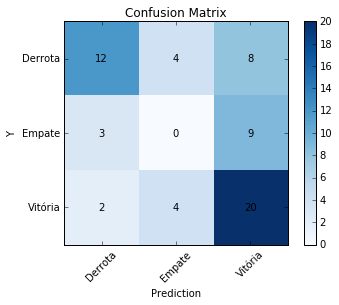

In [24]:
clf = KNeighborsClassifier(n_neighbors=15)
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

####  Using KFold with KNeighborsClassifier (PCA for every collumn )

0.428568548387


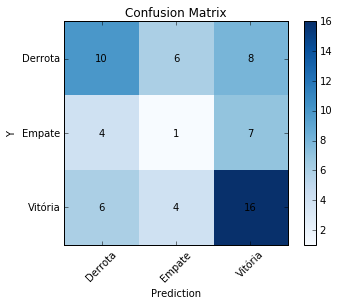

In [55]:
clf = KNeighborsClassifier(n_neighbors=15)
print(np.mean(cross_val_score(clf,inputsPCA,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputsPCA,outputs)

#### Using SVM - Regression for predict number of goals before predict winning team

In [57]:
clf = svm.SVR()
KFoldRC(clf,inputs,outputsR)

 = Score:5.54e-01[+/- 1.04e-01]


0.55419354838709678

0.391505376344


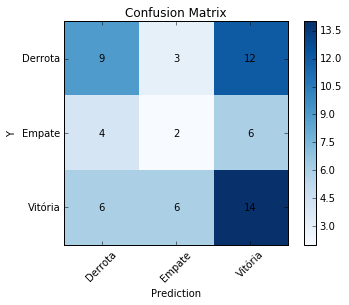

In [61]:
clf = DecisionTreeClassifier()
print(np.mean(cross_val_score(clf,inputs,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputs,outputs)

0.395241935484


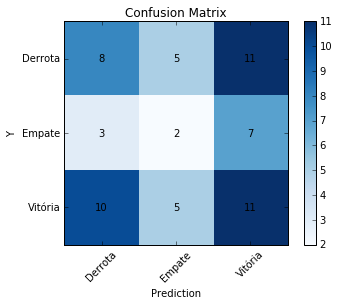

In [60]:
clf = DecisionTreeClassifier()
print(np.mean(cross_val_score(clf,inputsPCA,outputs,cv=10)))
holdoutPlotConfusionMatrix(clf,inputsPCA,outputs)